# Inequality in Philadelphia
* Holly Paige Konner
* Mathew Brook O'Donnell
* Comm 318 Stories From Data
* December 20th, 2020


![](img/main_image.jpg)


### From Food Insecurity to Lack of Public Health Services
This project is created as a tool for philanthropic consulting. There is a lot of power held within this data and the analysis carried out that can be pushed forward and implemented to create change that will serve Philadelphia. All of this data is publicly available, but must be understood and applied for the type of systematic change we need to occur. In this project I will go through the steps of how to analyze, understand, use and apply this data to create positive change.

### Introduction:
Philadelphia is a flourishing city but exhibits drastic inequalities of income, access, and public service. My initial concern was so-called "food deserts", and lack of access to healthy and affordable food for many Philadelphia residents and their families. Through my research I quickly realized food was not the only obstacle many families were facing in terms of nourishing and keeping their families healthy. There are many external factors such as out of school recreational programs, public hydration stations, public exercise equipment, walkable access to healthy food, and public initiatives such as "Philly Rising" serving these challenged communities.

My data, when looked at closely unlocks much about the inequality within the city of Philadelphia and food security. This data was collected from [OpenDataPhilly](https://www.opendataphilly.org/) and explored for the purposes of a communications class at the University of Pennsylvania called ["Stories From Data"](https://github.com/mbod/comm318_fall2020/blob/master/syllabus.md).

### History:

Philadelphia is known as a diverse and thriving city, but has a dark relationship to poverty and inequality. 400,000 people in Philadelphia live below the poverty line, which is estimated to be about $19,700 a year for an adult with two children at home. Unfortunately many families who fall under this category have more than two mouths to feed and find it very challenging and difficult to grant their children and themselves access to healthy food and health services. 

> “According to a 2015 survey conducted by the Public Health Management Corp., Philadelphians in poverty were twice as likely to describe their general health as poor or fair, and they had higher levels of chronic illness, including asthma and diabetes, than other residents. Life expectancy was lower in poor ZIP codes than in wealthier ones.”  
> https://www.pewtrusts.org/en/research-and-analysis/reports/2018/09/26/philadelphias-poor-experiences-from-below-the-poverty-line

There is no reason that ones' socioeconomic status should have an impact on their health, life expectancy, or quality of life. This pattern of inequality needs to be understood and changed not only by government agencies but also Philadelphia constituents need to band together and ignite grassroots local change.




### Goals:
My aim is to publish my data analysis to two separate types of institutions. I'd like to bring my data to food shelters and aid programs to allow them to use the statistics on their websites, in brochures, and to acquire donors/volunteers. My other goal is to bring my findings to government agencies to request institutional change within Philadelphia and put government programs in place that will target and relive the food related anxiety that many Philadelphia constituents are feeling.

### Analysis:

The data analysis was carried out using Python and particularly the data analysis libraries [Pandas](https://pandas.pydata.org/) and [GeoPandas](https://geopandas.org/). This report includes a series of code cells that dynamically produce data analytical results. In addition, the data files and detailed analysis notebooks are available in a [repository on github.com](https://github.com/hkonner/comm318_F20_Final_Project) for readers who would like see more detail or carry out further analysis.

### Data:
I began collecting CSV data and quickly realized through suggestions from my peers and professors that GEO-data would be much more useful for the work I am aiming to do. I collected geojson data from 8 different data sets that I found on [Philly Open Data](https://www.opendataphilly.org/). 

My Data sources are titled:
* ["Farmer's Market Locations"](https://www.opendataphilly.org/dataset/farmers-markets-locations)
* ["Walkable Access to Healthy Food"](https://www.opendataphilly.org/dataset/philadelphia-food-access)
* ["Neighborhood Food Retail"](https://www.opendataphilly.org/dataset/neighborhood-food-retail)
* ["Parks and Recreation Out of School Time Programs"](https://www.opendataphilly.org/dataset/ppr-out-of-school-time-programs)
* ["Philly Rising Boundaries", "PPR Hydration Stations"](https://www.opendataphilly.org/dataset/philly-rising-boundaries)
* ["PPR Adult Exercise Equipment"](https://www.opendataphilly.org/dataset/ppr-adult-exercise-equipment)
* ["Farmer's Markets "Acceptance of PhillyFoodBucks"](https://www.opendataphilly.org/dataset/farmers-markets-locations)


These will be plotted and analyzed below in tandem with the supporting data of Philadelphia neighborhoods, geography, and zip-code data. I began with counting, reading, plotting and understanding the Data -- I then began a uniform collection of data onto a map of Philadelphia, comparing all of my data to the same visual map made which makes it easier for me and any audience to quickly and clearly see what the data patterns were and give ideas on how to mend these systems.

Supplemental Data (For mapping and plot comparisons):
* Census_Tracts_2010.geojson (https://www.opendataphilly.org/dataset/census-tracts)
* Planning_Districts.geojson (https://www.opendataphilly.org/dataset/planning-districts)
* Political_Divisions.geojson (https://www.opendataphilly.org/dataset/political-ward-divisions)
* Zipcodes_Poly.geojson (https://www.opendataphilly.org/dataset/zip-codes)

In [ ]:
# setting up the Python environment
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#Loading Data Below:
nb_gdf = gpd.read_file('../data/NeighborhoodFoodRetail.geojson')
walk_gdf = gpd.read_file('../data/Walkable_Access_Healthy_Food.geojson.json')
ee_gpf = gpd.read_file('../data/ppr_adult_exercise_equipment.geojson.json')
ex_eqip_gdf = gpd.read_file('../data/ppr_adult_exercise_equipment.geojson.json')
fm_gdf = gpd.read_file('../data/Farmers_Markets.geojson.json')
prb_gdf = gpd.read_file('../data/PhillyRising_Boundaries.geojson')
hs_gdf = gpd.read_file('../data/PPR_Hydration_Stations.geojson')
oos_gdf = gpd.read_file('../data/PPROut_of_School_Time_Programs.geojson')

accessible_score_gdf=gpd.read_file("../data/processed_data/accessible_score_by_neighborhood.geojson")

### Mapping Philadelphia 

A foundational question for these analysis relates to how the City of Philadelphia should be divided up in order to examine the similarities and disparities in food and resource accessibility.



![](img/final_image.jpg)


The core data set, described below, focuses on access to key food resources and is based upon groups of blocks. The units are derived from the survey tracts used by the US Census Bureau.


* The geometry field in this data set defines the boundaries of these blocks and groups of blocks as shapes.
* The following map shows their boundaries. The x and y axes show the longitude and latitude coordinates for the Philadelphia area. 


Number of block group units: 1276


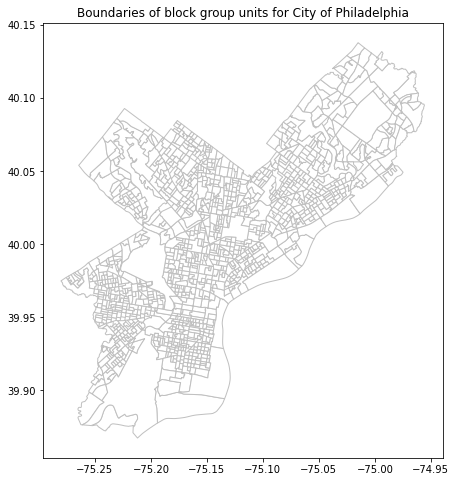

In [33]:
accessible_score_gdf.plot(color='white', edgecolor='#c0c0c0', figsize=(8,8))
plt.title('Boundaries of block group units for City of Philadelphia')
print(f'Number of block group units: {accessible_score_gdf.shape[0]}')

* There are 1276 block group units in the data set.
* This number of units and their granularity is very useful for accuracy. That is, they capture the complexity of Philadelphia streets and neighborhoods that a larger unit in a way a  zipcode unit does not. 
* However, they are difficult to read and generalize patterns from.
    - It is important to find a balance and use different metrics for different purposes
    - For change on a specific government level, block groupings are helpful for details
    - For efforts to inspire donations and volunteers, neighborhood units are easier to 
      digest because they are easy to recognize patterns in

### Philadelphia Planning Units
#### My data is much easier organized by the outlines of the 18 Districts for Philadelphia2035 District Plans.
* https://www.opendataphilly.org/dataset/planning-districts

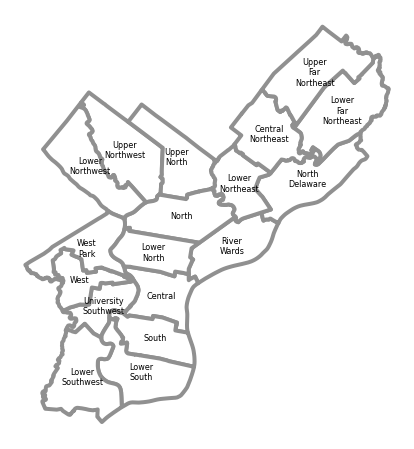

In [34]:
planning_districts_gdf = gpd.read_file('../data/Planning_Districts.geojson')
planning_districts_gdf['centroid'] = planning_districts_gdf['geometry'].centroid

def draw_region_label(r, basemap, score=False):
    region = r['DIST_NAME'].replace(' ','\n')
    
    if score:
        cscore = r['combined_score']
        region += f'\n({cscore:.1f})'
    
    x = r['centroid'].x
    y = r['centroid'].y
    bmap.text(x,y,region, ha='center', 
              va='center', fontsize=8)

bmap=planning_districts_gdf.plot(color='white', edgecolor="#909090", 
                                 linewidth=4,
                                 figsize=(8,8))

planning_districts_gdf.apply(lambda r: draw_region_label(r, bmap), axis=1)
bmap.axis('off');

### Philadelphia Neighborhood Units

This above map shows a less specific categorization of Philadelphia split into 18 government recognized districts that starting in 2035 will be used for city planning and regulations.
> By creating these neighborhood groupings, it is much easier to generalize and look at this data.
> For a reader it is easier to notice a problem area and be pointed to it by name such as "West Park" as oppose to 'The NorthWest corner of Philadelphia".

## Accessibility Score
In order to create a scale that I can generalize and measure all my data against I have decided to join two data sets and create a composite accessibility metric then map those metrics.

I will combine the data from Neighborhood Food Retail and Walkable Access to Healthy Food to form an accessibility score ranking locations from lowest to highest with multiple factors counting towards that score.

### Why I created an accessibility score
I created an Accessibility Score because my hope is that these scores could one day be published and used to pitch innovations in the food industry that create accessibility across socioeconomic and geodemographic groups providing access to healthy food for all.

In [6]:
#Accessibility Score Data Loading
nb_gdf["geometry"].take([0,1,2])[:1000]
walk_gdf["geometry"].take([0,1,2])[:1000]
pd.merge(nb_gdf, walk_gdf, left_on="GEOID10", right_on="GEOID")
merged_gdf = gpd.sjoin(walk_gdf, nb_gdf,  op="within")

### Assigning Values to categories

Below I assigned values to the significant columns from the two data sets. The distribution of points is not equal among categories to avoid inconsistencies and "ties" within the rankings. For the Accessibility to High Quality produce score I assigned 0 points to "No Access", 4 points to "Low Access", and 6 points to "Moderate or High Access". For the Walkable Accessibility score I assigned 0 points to "No Access:, 1 point to "Low Access", 3 points to "Moderate Access", and 5 points to "High Access". I awarded fewer points to the Walkable Access score because I am accounting for a portion of those without walkable access to have access to public transport or a vehicle.

In [7]:
map_hpss_to_score = {
    'Moderate or High Access': 6, 
    'Low Access': 4,
    'No Access': 0, 
}

map_walk_access_to_score = {
    'No Access': 0, 
    'Low Access': 1, 
    'Moderate Access': 3,
    'High Access': 5, 
}

The table below shows the breakdown of the combined Accessibility Score between Neighborhood Food Retail and Walkable Access to Healthy Food

In [8]:
merged_gdf['combined_score']=merged_gdf['ACCESS_'].map(map_walk_access_to_score) + merged_gdf['HPSS_ACCESS'].map(map_hpss_to_score)

In [9]:
merged_gdf['combined_score'].value_counts().to_frame()

,combined_score
11.0,3999
7.0,1860
6.0,1061
9.0,964
0.0,437
5.0,269
1.0,210
4.0,204
3.0,7


### Results
With the highest possible score being a 19, there are 3999 neighborhoods with a score of 11.0 which is still promising, but what concerns me is the 437 constituents of Philadelphia with a score of 0.0 and the 210 more with a score of 1.0

## Accessibility Heat Map

#### The More Access the Darker red, the Less Access the lighter Beige

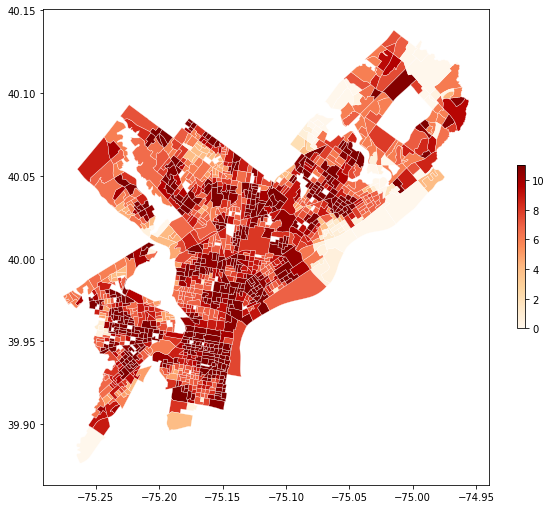

In [36]:
accessible_score_gdf.plot(figsize=(10,10), edgecolor='white', linewidth=0.3, column='combined_score', 
                categorical=False, legend=True, cmap='OrRd', legend_kwds={'shrink': 0.3});

### Accessibility Heat Map Analysis
This map above shows a visual representation and rating of the Philadelphia neighborhoods sorting them by their accessibility scores. Scores of 10 and above are depicted with a dark maroon, and scores of 2 or below are depicted with beige. There is a region or cluster of neighborhoods in North East Philadelphia that has extremely low scores, and the color is almost White showing how deprived of access this neighborhood is. This is consistent with my findings above, in which the boarders of Philadelphia are those lacking most in access.

### Overlay of Philadelphia Districts and Accessibility Scores
##### Combining My accessibility score with the 18 Philadelphia Planning districts makes the data easier to read and more generalizable

By organizing Philadelphia by these regional names, analyzing, explaining and understanding the accessibility maps becomes a much more clean and concise process.

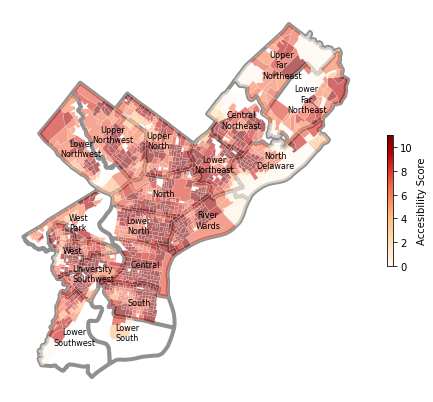

In [37]:

bmap=planning_districts_gdf.plot(color='white', edgecolor="#909090", 
                                 linewidth=4,
                                 figsize=(8,8))

accessible_score_gdf.plot(ax=bmap, edgecolor='white', linewidth=0.3, column='combined_score', 
                 categorical=False, legend=True, 
                 cmap='OrRd', legend_kwds={'shrink': 0.3, 
                                           'label': 'Accesibility Score'},
                 alpha=0.6
                )    


planning_districts_gdf.apply(lambda r: draw_region_label(r, bmap), axis=1)
bmap.axis('off');

By overlaying accessibility scores with Philadelphia government recognized districts I can easily make generalizations and groupings to help readers understand which districts are at risk and need more attention both from government entities and Philadelphia natives who have the means to give back.
##### Northern Philadelphia Deep Dive
> If you take a general look at the "North" Philadelphia region, it is very clear that this is a well off district with high and moderate accessibility scores. When you take a deep dive and look closer at the block cut offs, there are a few blocks with Accessibility Scores within the 0-4 category. What is important about this image is that these blocks with lower accessibility are not washed out by the block groups that have extremely high accessibility, and can be seen, recognized, and paid attention too.
##### River Wards Deep Dive
> The "River Wards" district has a much clearer block accessibility divide showing the north of this district has a much lower accessibility score (0-4) than the western portion of this district. These block groups are much larger than previous groups discussed but they are still drastically different from one another despite being in the same government recognized district. These stark differences are important to keep in mind when the government creates relief services and philanthropic efforts -- they should not focus on the neighborhoods with only low accessibility levels but keep in mind that there are a lot of struggling blocks within higher accessibility districts.

## Marketability of these scores
### One way to market these scores to donors, organizations, or local government is by gathering and publishing average accessibility scores by district

In [12]:
cols_to_keep = ['geometry', 'TOTAL_LPSS', 'LPSS_PER1000', 'TOTAL_HPSS',
       'HPSS_PER1000', 'PCT_HPSS', 'PCT_VEHICLE_AVAILABILITY',
       'TOTAL_RESTAURANTS', 'PCT_POVERTY',  'combined_score']

acc_score_gdf = merged2_gdf[cols_to_keep]

In [13]:
districts_gdf=gpd.sjoin(planning_districts_gdf,acc_score_gdf, how='right', op="contains")

In [14]:
districts_gdf=districts_gdf.dissolve('DIST_NAME',aggfunc='mean')

In [15]:
accscore_districts_gdf=pd.merge(planning_districts_gdf, 
         districts_gdf['combined_score'],
         left_on='DIST_NAME',
         right_index=True)

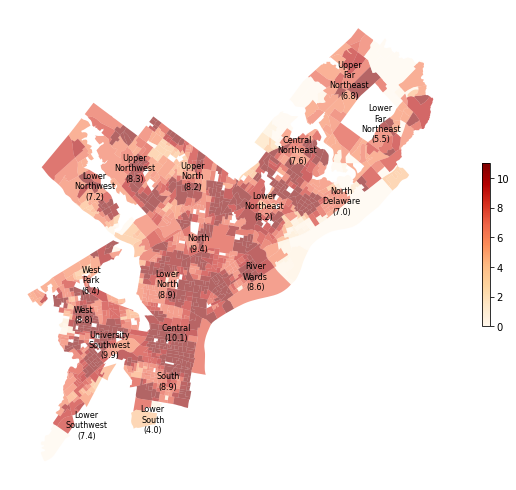

In [16]:
bmap=acc_score_gdf.plot(column='combined_score', 
                             cmap='OrRd', figsize=(10,10),
                             alpha=0.6,
                             legend=True, 
                             legend_kwds={'shrink': 0.3})
accscore_districts_gdf.apply(lambda r: draw_region_label(r, bmap, score=True), axis=1)
bmap.axis('off');

This scoring is much more visually pleasing to look and and offers clearer visuals for a brochure or website but loses much of the detail that comes with looking at each neighborhood or block on its own. This map and these clearly deviated averages are marketable. There is a balance that we need to consider, it is important to understand by creating a map of averages we loose much of the detail and subtle patterns can become easily lost. In Philadelphia blocks or groups of blocks can be close together but have very different profiles in terms of wealth, resources, and accessibility. So even though North gets a high average score there are pockets with very low scores when you analyze the more specific charting.
##### Central Deep Dive
> The District of "Central" Philadelphia has a mean accessibility score of 10.1 out of the highest possible score of 19. The highest score earned by any geolocation was an 11, so "central" Philadelphia is extremely well off and has good accessibility in comparison to the rest of Philadelphia. It is important to note that while most of Central Philadelphia is colored in maroon and receiving a high accessibility score, there are a few blocks that are lighter in color and denote lower access.
##### Lower South Deep Dive
> The District of "Lower South" Philadelphia has a mean accessibility score of 4.0 out of the highest possible score of 19. This is a district that requires lots of intervention and help from either government entities or nonprofit groups because they are, on average, very low on the accessibility score with the southern most region with almost no accessibility and the Northern region of this district with moderate accessibility.

# Other Inequality Factors In Comparison to Accessibility Score
I am overlaying the Geo Data for the following Public Health services with the Accessibility score that I created.

### Public Adult Exercise Equipment
This data set shows the locations of adult exercise equipment located within or maintained by Philadelphia Parks and Recreation (PPR). Public Exercise equipment offers many benefits ranging from physical to social gains that improve overall health internally and externally. 
* Here are some of the benefits to outdoor exercise
    - It is a natural antidepressant. Outdoor exercise can help ward off seasonal affective disorder (SAD), 
      depression and anxiety because sunshine naturally increases serotonin, a hormone that affects your mood. 
      Also exercise itself produces endorphins, another feel-good hormone that boosts your mood and reduces pain.
    - It challenges your body. When exercising on ever-changing outdoor terrain, your body is more challenged than
      when it is working out on a flat indoor surface,
    - It provides mental relief. “Outdoor exercise is enjoyable and feels more like play than a chore.”
    - You can turn it into a social outing. Instead of meeting a friend for lunch or coffee, consider going for a
      walk. Or take your family out for a walk together instead of watching TV after dinner.
    - It’s free. All you need to get a fantastic workout is a safe, well-lit park, track, neighborhood or walking
      trail, and your bodyweight. No gym membership required.
    - It can be a team-building experience. Joining a team can help you stay consistent with exercise and it can
      bring back those feelings you had as a kid playing outside—and unlike high school, no athletic ability is 
      required.”
    
https://www.piedmont.org/living-better/7-health-benefits-of-outdoor-exercise

### Acceptance of Philly Food Bucks
The data I analyzed on farmers market locations contained a column stating whether the market accepted Philly Food Bucks. In 2010, the Philadelphia Department of Public Health and The Food Trust launched the Philly Food Bucks program. This healthy food incentive program encourages SNAP (food stamp) recipients to use their benefits to purchase fresh, local ingredients at participating farmers markets throughout the city. Today, Food Bucks are available at farmers markets statewide.

For every five dollars spent using SNAP at participating markets, customers receive a two dollar Food Buck coupon for fresh fruits and vegetables, increasing the purchasing power of farmers market shoppers who use SNAP by 40 percent.
http://thefoodtrust.org/what-we-do/foodbucks

### Philly Rising Boundaries
The Philly Rising Boundaries data shows the locations of PhillyRising Collaborative which targets neighborhoods throughout Philadelphia that are plagued by chronic crime and quality of life concerns, and establishes partnerships with community members to address these issues. The PhillyRising Team coordinates the actions of City agencies to help neighbors realize their vision for their community through sustainable, responsive, and cost-effective solutions. Together, residents and the City government can keep Philly rising!
http://www.mayorsfundphila.org/initiatives/phillyrising-mural-arts/

### Public Hydration Stations
Locations of hydration station and water fountains on or near Philadelphia Parks and Recreation (PPR) assets. "It's important to provide clean, free drinking water in multiple areas by way of hydration stations. Although someone may not automatically feel dehydrated, it happens more frequently than you'd think and can easily zap energy and reduce the ability to focus or do well in school, at work, or during leisure time." 
https://www.drinkflowater.com/blog/the-importance-of-hydration-stations-for-schools/

### Out of School Recreational Programs
Out-of-School Time (OST) is the time that a child or youth spends in after school or summer programming. In Philadelphia, OST programs are provided for young people in grades pre-K through 12.

OST is important because it: Supports working parents and caregivers, benefits a child’s academic, social, and personal development and helps children stay safe and avoid high-risk behaviors.
https://www.phila.gov/programs/out-of-school-time-ost/

# Accessibility Comparisons

In [17]:
# Loading Comparison Data
    ## I begin by loading a Base Map
base_zip_gdf = gpd.read_file('../data/Zipcodes_Poly.geojson')
base_ward_gdf = gpd.read_file('../data/Political_Divisions.geojson')
    ## I then load the rest of the Data
fm_gdf['FOOD_BUCKS_YN']=np.where(fm_gdf['ACCEPT_PHILLY_FOOD_BUCKS_'].isnull(),'No','Yes')
ex_eqip_gdf['label']="Public Exercise Equipment"
    ## I then Load the Accessibility Score Base
accscore_gdf = gpd.read_file('../data/processed_data/accessible_score_by_neighborhood.geojson')

#### The Six Plots Below Show Inequality in multiple dimensioms
 The first plot is the base accessibility score, and plot 2-6 show different aspects of my research in tandem with the base accessibility score

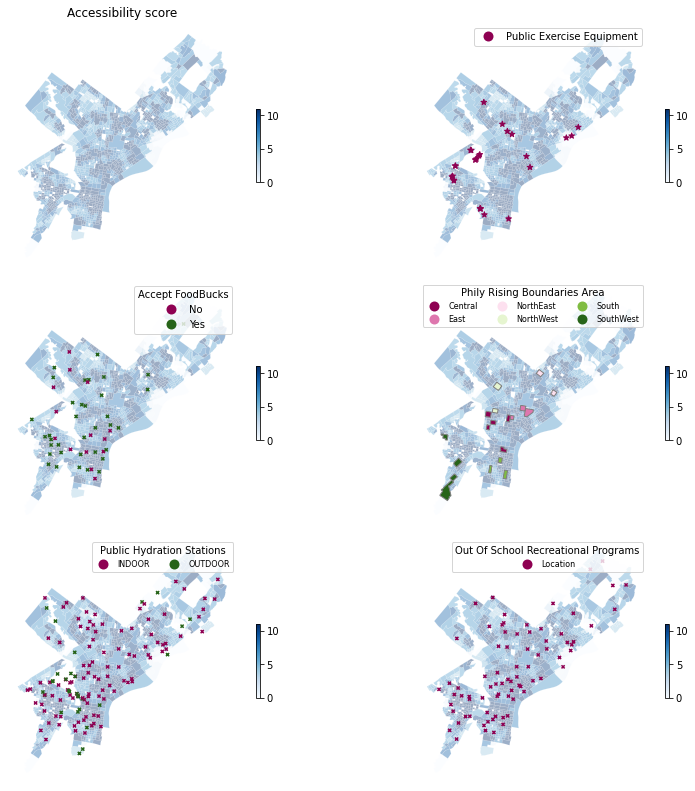

In [18]:
fig, ax = plt.subplots(3,2, figsize=(14,14))


base_plots = []

for row in range(3):
    for col in range(2):
        

        bp=accscore_gdf.dropna().plot(figsize=(10,10), 
                                   ax=ax[row][col],
                                   edgecolor='white', linewidth=0.3, column='combined_score', 
                                 categorical=False, legend=True, cmap='Blues',#'Greys', 
                                  alpha=0.4,
                                  legend_kwds={'shrink': 0.3})
        
        bp.axis('off')
        base_plots.append(bp)


        
cmap = 'PiYG'

base_plots[0].set_title('Accessibility score')

ex_eqip_gdf.plot(ax=base_plots[1], column='label', 
                 categorical=True, legend=True, marker='*', cmap=cmap)
            
fm_gdf.plot(ax=base_plots[2], edgecolor='gray', 
            column='FOOD_BUCKS_YN',
            categorical=True,
            legend=True, cmap=cmap, marker='x', markersize=10,
            legend_kwds={'title': 'Accept FoodBucks', 
                         'loc':'upper right'
                        }
           )
prb_gdf.plot(ax=base_plots[3], edgecolor='gray', 
            column='DIVISION',
            categorical=True,
            legend=True, cmap=cmap, marker='x', markersize=10,
            legend_kwds={'title': 'Phily Rising Boundaries Area', 
                         'loc':'upper right', 'ncol': 3, 
                         'fontsize': 8,
                        }
           )
hs_gdf.plot(ax=base_plots[4], edgecolor='gray', 
            column='LOCATION',
            categorical=True,
            legend=True, cmap=cmap, marker='x', markersize=10,
            legend_kwds={'title': 'Public Hydration Stations', 
            'loc':'upper right', 'ncol': 3, 
            'fontsize': 8}
           )
            
oos_gdf.plot(ax=base_plots[5], edgecolor='gray', 
            column='label',
            legend=True, cmap=cmap, marker='x', markersize=10,
            legend_kwds={'title': 'Out Of School Recreational Programs', 
                         'loc':'upper right', 'ncol': 3, 
                         'fontsize': 8,
                        }
           )


plt.subplots_adjust(hspace=0.05, wspace=0.1)


### Plot Analysis
 * Public Exercise Equipment
      >The public exercise equipment, noted by the maroon star, is spread out and located nearby parks and 
      recreational centers which allow for the equipment. I noticed that in the NorthEastern area of Philadelphia,
      furthest from the city center there aren't just less public exercise locations but none whatsoever. There is 
      an association with lighter grays (lower accessibility score) and Northwestern Philadelphia.
 * Acceptance of Food Bucks
      >Most notable upon initial viewing of this map is not whether a farmers markets accepts Philly Food Bucks, 
      but that there are no farmers markets at all as you head East and North the farmers markets become less 
      clustered and eventually there are none whatsoever. I am pleased to record that there seems to be an almost
      even distribution between farmers markets that accept and don't accept (shown as "yes' in green and "no" in 
      maroon) which will hopefully skew towards mostly "yes" in the coming years. The Southern neighborhoods 
      of Philadelphia seem to be on the right track showing mostly green markets that "yes" do accept Philly 
      food bucks!
 * Philly Rising Boundaries
      >The Philly Rising locations are denoted by boundaries as oppose to points, because they represent 
      neighborhoods where this program is present and active. Although this is a new program, there are only 
      locations in Central, South, and Southwest Philadelphia which is great because there are scattered low 
      access areas within those regions. The Northern and Northeastern regions of Philadelphia have combined the 
      lowest accessibility score, and are therefore more challenged areas. PhillyRising is doing amazing work and 
      hopefully with growth and the support of the city they cane expand to cover more of Philadelphia.
 * Public Hydration Stations
      >The public hydration stations are very evenly scattered across the city of Philadelphia with less outdoor
      hydration stations, which makes sense as those would only be located in parks or public recreational 
      locations. Philadelphia has done an amazing job at making sure there is very little inequality in the
      ability to access clean  fresh water.
 * Out of School Recreational Programs
      >The Out of School recreational programs are well spread out location-wise, but there is inequality within 
      the clustering and number of locations per neighborhood. These programs are much more concentrated in center
      city and are further apart and more scarce as they go north and east.

![](img/second_image.jpg)

# Philly Rising
### I am highlighting the Philly Rising program because this grassroots efforts is one of the most promising efforts for change I have come across in my research.
"City government exists to improve the quality of life of Philadelphians.  Safety and the sense of safety are core to a resident's quality of life and desire to live and work in the City.  Philadelphia's neighborhoods should all be desirable and thriving places to live and work. To achieve this goal, the Philadelphia Police Department has re-focused its geographically-based method of service delivery. Each Police District is divided into Police Service Areas, each of which has a command structure dedicated to resolving crime and disorder issues in that particular neighborhood. To complement this policing strategy and to improve government efficiency, the Managing Director's Office has taken charge of coordinating the delivery of City services in areas plagued by chronic crime and disorder. This model, called the PhillyRising Collaborative, does this by significantly altering the way the City delivers services to its residents in areas with chronic crime and disorder problems that require a coordinated multi-agency response.  This coordinated approach focuses on building the capacity of local organizations, so that they may institute visible, sustainable changes in their neighborhoods."
* https://sites.google.com/site/phillyrisingcollaborative1/about

> The most inspiration aspect of this program and this movement is that local residents get to be a part of change and are involved in changing their own destiny and that of their children, neighbors, and community at large.
> This program is inclusive and volunteers are not limited by their income level as much of the work involves donating time and energy as oppose to finances.

#### Memorial Garden
![](img/memorial_garden.jpg)
This image shows middle schoolers who created a memorial garden, sponsored by Philly Rising, to honor the lives of friends and family impacted by gun violence.
> The key to creating communities is encouraging service and acts of kindness even at a young age.
#### John B. Stetson Charter School
"John B. Stetson Charter School is a community school serving  more than 800 students in grade 5-8. Our school is open to students who live within its catchment zone which includes parts of surrounding neighborhoods like Kensington/West Kensington, Tioga Park, Juniata and Richmond."
* https://stetsoncharter.org/apps/pages/index.jsp?uREC_ID=1399682&type=d&pREC_ID=1472088
> This charter school is located within the North Delaware, Philadelphia district, with a larger than 50% poverty level and a 0-2 Accessibility Score (one of the lowest in the city) and this school still aims to give back and reform its beloved community.

#### Spring Cleanup
![](img/spring_cleanup.jpg)
The images above show a spring cleanup day sponsored by Philly Rising that encouraged the community to come together, cleanup and take pride in the cleanliness and state of the place that they call home.
> This project was twofold as it cleaned up the neighborhood and fostered a sense of community and togetherness that came from the local volunteers.

# Percentage Poverty
### I account for percentage poverty in my main data sets, but I believe it is important to analyze this data on its own.
Below shows Percentage Poverty in Philadelphia next to my Accessibility Score.

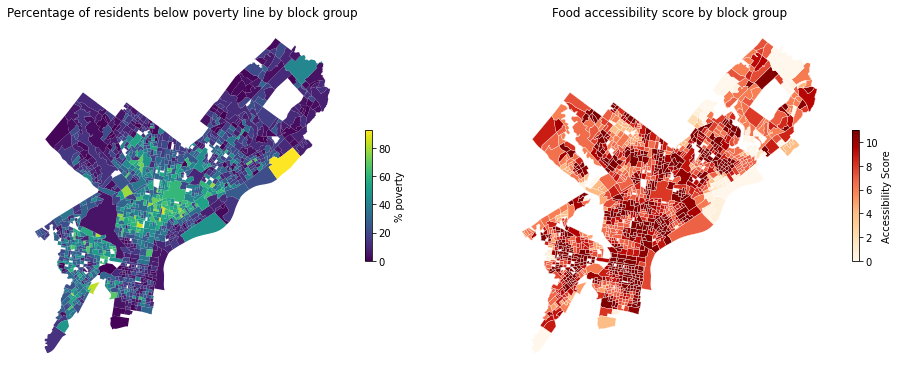

In [40]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

merged2_gdf.plot(ax=ax[0], column='PCT_POVERTY', legend=True,
                legend_kwds={'shrink': 0.3, 'label': '% poverty'})

merged2_gdf.dropna().plot(ax=ax[1], figsize=(10,10), edgecolor='white', linewidth=0.3, column='combined_score', 
                categorical=False, legend=True, cmap='OrRd', 
                          legend_kwds={'shrink': 0.3, 'label':'Accessibility Score'})

ax[0].set_title('Percentage of residents below poverty line by block group')
ax[0].axis('off')

ax[1].set_title('Food accessibility score by block group')
ax[1].axis('off');

These two maps in comparison show results consistent to my findings in other maps and my hypothesis that I am making regarding my data. Most notable is the yellow region that is marked by an over 80% poverty level, which correlates to a very low 0-2 Accessibility score noted by the cream color in that region. This falls into the "North Delaware" district of Philadelphia.
##### Central Philadelphia Poverty
>Most notable in the map of "percentage of residents below the poverty line by block group" is the wide array of colors denoted by the block groups in central Philadelphia. The range of blues, greens, and yellows shows the wealth disparity in this area and just how clustered the different poverty levels are in such a small geographic region.

##### North Delaware Deep Dive
>One of the most notable poverty ridden region is North Delaware, which is almost completely yellow and surrounded by dark blues and purples. This region is over 80% under the poverty line, which means that over 4 in 5 people are living in poverty and most likely unable to support themselves or their families.

#### Poverty By Category
I am charting poverty into three distinct groups
        1. less than 20% (low poverty)
        2. 20-50%
        3. greater 50%
It is important to note that there is a large range between these groups, but for visual marketing purposes it is important to make distinctions.

In [20]:
pov_tests = (merged2_gdf['PCT_POVERTY'].isnull(),
             merged2_gdf['PCT_POVERTY']>50,
             (merged2_gdf['PCT_POVERTY']>20) & (merged2_gdf['PCT_POVERTY']<50),
             merged2_gdf['PCT_POVERTY']<=20,
            )

pov_cats = [None, '>50%', '20%-50%','<20%']

merged2_gdf['poverty_cat'] = np.select(pov_tests, pov_cats)

<AxesSubplot:>

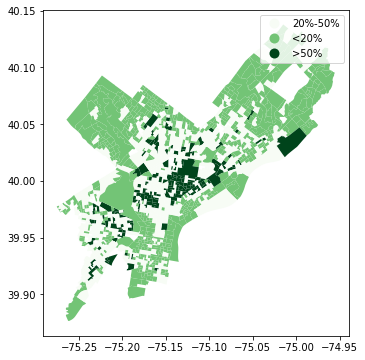

In [21]:
merged2_gdf.plot(column='poverty_cat', categorical=True, 
                 figsize=(6,6),
                 legend=True, cmap='Greens')

The map above distributed poverty into three categories and shows similarly consistent scores with the rest of my analyses. The North Delaware region is noted as dark green indicating a larger than 50% poverty level. What is surprising is that the highest average accessibility scores are in areas with >50% poverty. A revealing aspect of this map is that many areas in Central Philadelphia are marked as having more than 50% poverty levels, even though those areas show higher accessibility. This is representative of my claim that Philadelphia districts are extremely diverse in terms of access within district lines. The danger of averaging means is that a district may have some of the wealthiest and extremely struggling constituents living closely together, and only report an average of those two with an accessibility score that does not raise worry, resulting in less public programs being implemented in those areas.

##### Areas with over 50% poverty
> Most notable to my analysis in this map are not the areas with moderate or low poverty levels, but those with a more than 50% poverty level in their geodemographic region. A large block group of Eastern Philadelphia and then scattered block groups in center and South Philadelphia are marked dark green showing that there is a more than a 1 in 2 chance that the people living in those blocks are living under the poverty level. "The current federal poverty guidelines indicate that a family of three should be able to survive on 21,720 dollars per year. This number is the same whether the family lives in Provo, UT or Philadelphia, PA." More than 50% of families are making less than 21,720 dollars per year, which is a cause for alarm, immediate relief, and fundamental changes.

https://generocity.org/philly/2020/03/16/philadelphias-poverty-problem-is-bigger-than-you-ever-imagined/

# How Can We Implement Change Going Forward?
While Philadelphia has made much progress, there is much more work that needs to be done. From analyzing my data geographically, we need to focus on Northern and NorthEastern Philadelphia. These regions are plagued with inequality of access to many public programs, and are unable to afford to participate in private health, nutrition, or grocery plans. I hope that after reading this report, you feel inclined and inspired to volunteer, donate, and most importantly spread awareness and make the knowledge you have achieved today known by as many possible. We are stronger in numbers; the more people aware of these inequalities, the more people will band together to create fundamental change.

<u>If you would like to get involved, volunteer, or find out how best to help please email hkonner@sas.upenn.edu<u>